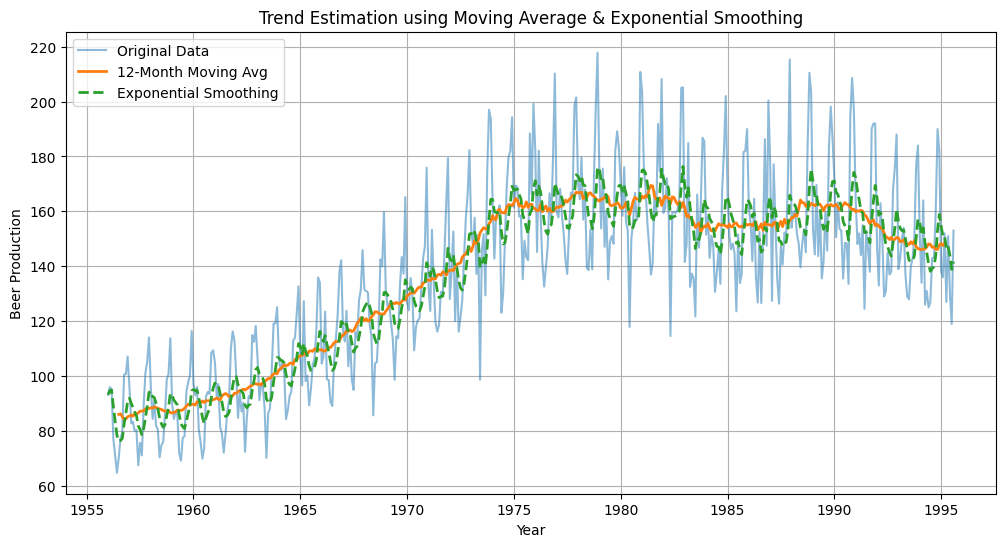

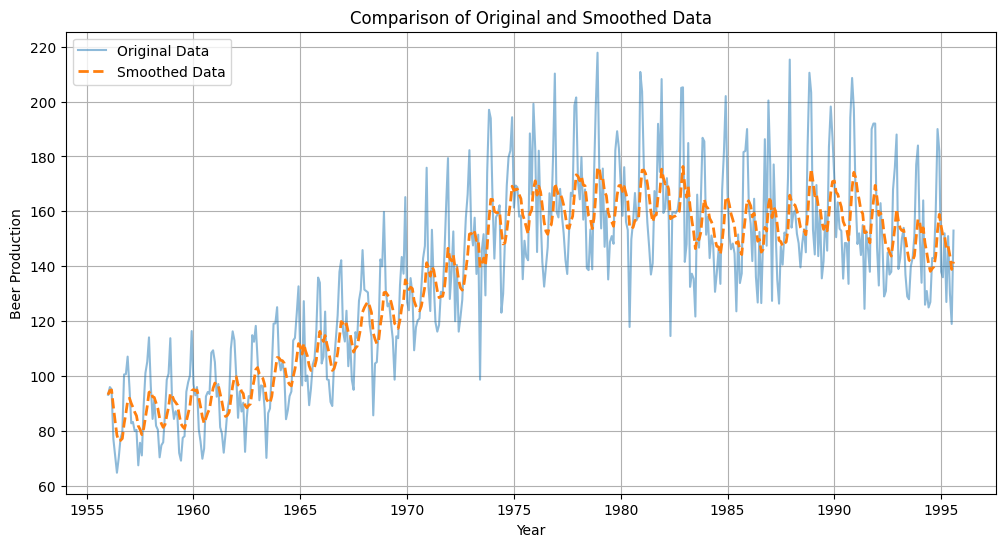

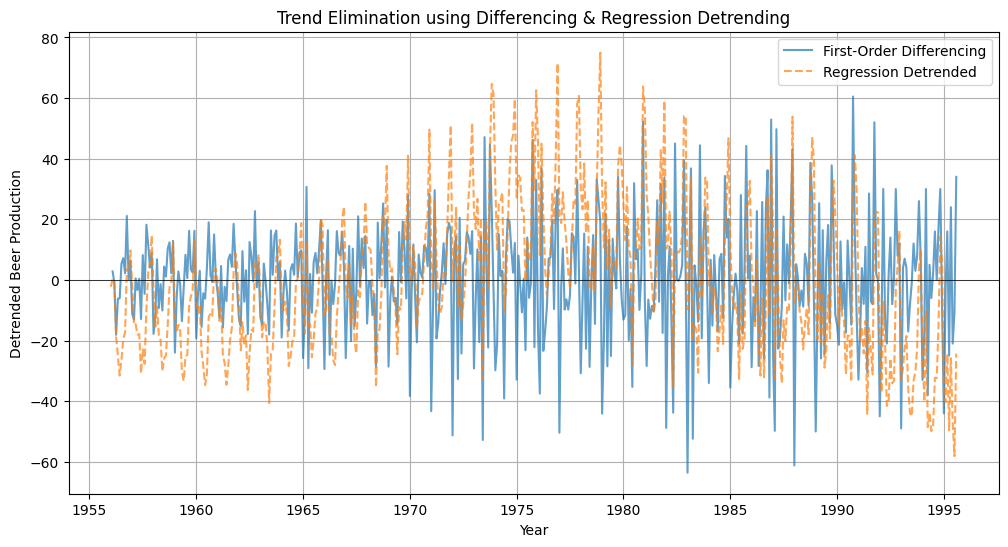

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = "monthly-beer.csv"
df = pd.read_csv(file_path)

# Convert 'Month' to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Set 'Month' as index
df.set_index('Month', inplace=True)

# Apply a 12-month moving average for trend estimation
df['Moving_Avg_12'] = df['Monthly beer production'].rolling(window=12, center=True).mean()

# Apply exponential smoothing for trend estimation (alpha=0.2 for moderate smoothing)
df['Exp_Smoothing'] = df['Monthly beer production'].ewm(alpha=0.2).mean()

# Plot original data and smoothed trends
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Monthly beer production'], label="Original Data", alpha=0.5)
plt.plot(df.index, df['Moving_Avg_12'], label="12-Month Moving Avg", linewidth=2)
plt.plot(df.index, df['Exp_Smoothing'], label="Exponential Smoothing", linewidth=2, linestyle="dashed")
plt.legend()
plt.title("Trend Estimation using Moving Average & Exponential Smoothing")
plt.xlabel("Year")
plt.ylabel("Beer Production")
plt.grid()
plt.show()

# Visualizing data before and after smoothing
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Monthly beer production'], label="Original Data", alpha=0.5)
plt.plot(df.index, df['Exp_Smoothing'], label="Smoothed Data", linewidth=2, linestyle="dashed")
plt.legend()
plt.title("Comparison of Original and Smoothed Data")
plt.xlabel("Year")
plt.ylabel("Beer Production")
plt.grid()
plt.show()

# Differencing (first-order to remove trend)
df['Differenced'] = df['Monthly beer production'].diff()

# Detrending using linear regression
X = np.arange(len(df)).reshape(-1, 1)  # Time index as independent variable
y = df['Monthly beer production'].dropna()  # Drop NaN values
X = sm.add_constant(X)  # Add intercept for regression

model = sm.OLS(y, X).fit()  # Fit linear regression
df['Detrended'] = y - model.predict(X)  # Remove estimated trend

# Plot detrended series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Differenced'], label="First-Order Differencing", alpha=0.7)
plt.plot(df.index, df['Detrended'], label="Regression Detrended", alpha=0.7, linestyle="dashed")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Trend Elimination using Differencing & Regression Detrending")
plt.xlabel("Year")
plt.ylabel("Detrended Beer Production")
plt.grid()
plt.show()